In [40]:
#importing packets
import pandas as pd
#importing the packages needed
import sys
!{sys.executable} -m pip install scipy
from sklearn.linear_model import LinearRegression
import numpy as np
import matplotlib.pyplot as plt
import datetime as dt
import scipy.stats as science
from pandas_datareader import data as pdr
from scipy.stats import norm
from datetime import date
import math
import statsmodels.api as sm
import seaborn as sb
import scipy.optimize as sco
import sys
!{sys.executable} -m pip install PyPortfolioOpt

from pypfopt import risk_models
from pypfopt import expected_returns
from pypfopt.expected_returns import ema_historical_return
from pypfopt.expected_returns import mean_historical_return 
from pypfopt.risk_models import exp_cov
from pypfopt.efficient_frontier import EfficientFrontier
from pypfopt.plotting import plot_efficient_frontier
from pypfopt.plotting import plot_weights
from pypfopt.cla import CLA

In [2]:
#defining the time
end = date.today()
start = end-dt.timedelta(days=512)

In [3]:
#importing data
stocks = ['AAPL','MSFT','TSLA', 'LMT','CAT','GE','UNH','ELV','MRNA','2222.SR','XOM','CVX']
data =pdr.get_data_yahoo(stocks,start,end)
data
prices = data.Close
#dropping na from the prices
prices =prices.dropna()
prices

Symbols,AAPL,MSFT,TSLA,LMT,CAT,GE,UNH,ELV,MRNA,2222.SR,XOM,CVX
Date,,,,,,,,,,,,
2021-06-14,130.479996,259.890015,205.896667,389.109985,219.009995,107.760002,399.160004,383.510010,207.410004,32.090908,62.070000,107.970001
2021-06-15,129.639999,258.359985,199.786667,389.799988,219.460007,108.320000,400.279999,384.970001,201.589996,32.090908,64.330002,110.300003
2021-06-16,130.149994,257.380005,201.623337,383.600006,217.160004,107.519997,397.250000,378.450012,197.839996,32.090908,64.099998,109.669998
2021-06-17,131.789993,260.899994,205.533340,382.899994,209.449997,104.000000,397.350006,377.809998,202.470001,32.045452,61.990002,107.070000
2021-06-21,132.300003,262.630005,206.943329,382.500000,213.210007,105.519997,398.070007,376.410004,208.240005,32.090908,62.590000,106.050003
...,...,...,...,...,...,...,...,...,...,...,...,...
2022-10-27,144.800003,226.750000,225.089996,471.929993,212.139999,76.000000,541.799988,531.619995,144.110001,34.700001,107.550003,177.899994
2022-10-31,153.339996,232.130005,227.539993,486.679993,216.460007,77.809998,555.150024,546.770020,150.330002,34.750000,110.809998,180.899994
2022-11-01,150.649994,228.169998,227.820007,485.630005,218.500000,78.209999,547.309998,544.530029,154.619995,34.849998,111.910004,182.220001


In [4]:
rf = 0.02

<AxesSubplot:xlabel='Symbols', ylabel='Symbols'>

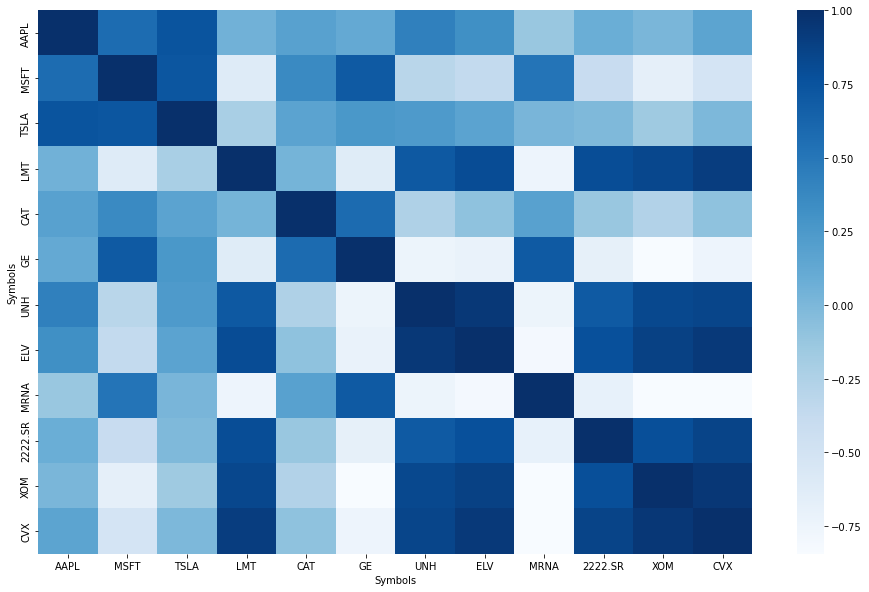

In [5]:
#correlation matrix prices
correlation_matrix_prices = prices.corr()
correlation_matrix_prices
plt.figure(figsize=(16,10))
sb.heatmap(correlation_matrix_prices, cmap="Blues", annot=False)

In [6]:
#calculating returns
returns = prices/prices.shift(1)-1
returns = returns.dropna()
returns
returns_dates=returns.index.to_frame().reset_index(drop=True)

<AxesSubplot:xlabel='Symbols', ylabel='Symbols'>

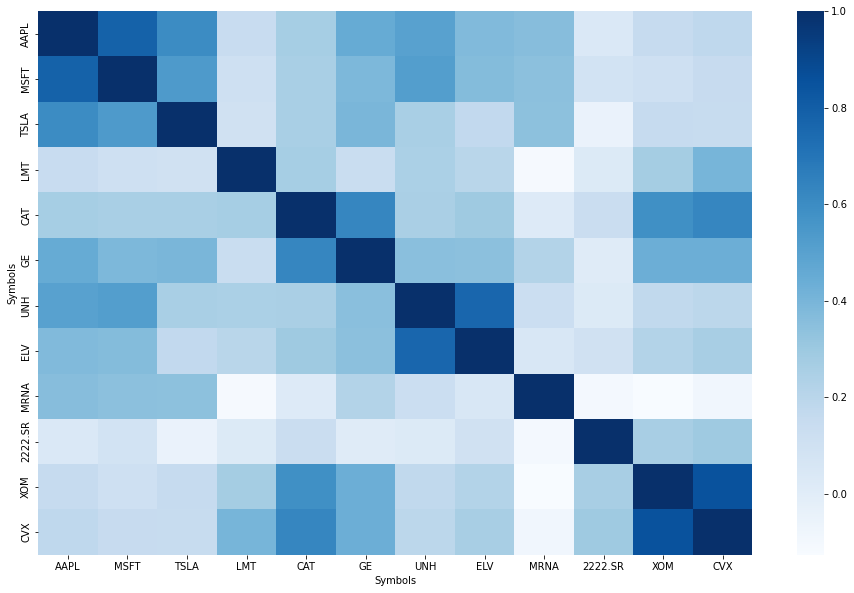

In [7]:
#correlation matrix prices
correlation_matrix_returns = returns.corr()
correlation_matrix_returns
plt.figure(figsize=(16,10))
sb.heatmap(correlation_matrix_returns, cmap="Blues", annot=False)

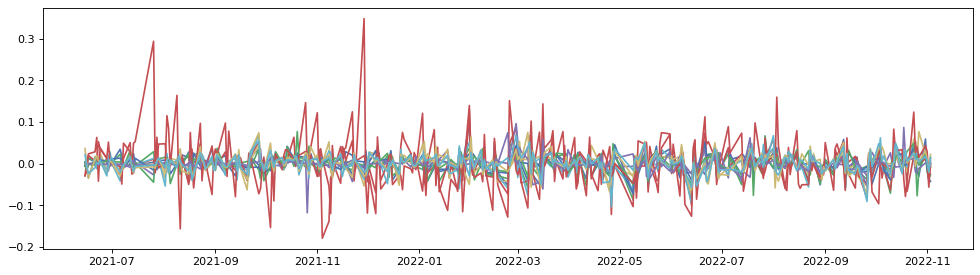

In [8]:
plt.figure(figsize=(15, 4), dpi=80)
plt.plot(returns)




In [9]:
#equally weighted portfolios
#calculting the returns and std deviation of the portfolio
number_of_columns = len(returns.columns)
vector_equal_weight = np.full((number_of_columns,1),1/number_of_columns)
returns_ew = np.dot(returns,vector_equal_weight)
returns_ew_annual = returns_ew.mean()*252
std_dev_ew_annual = np.dot(np.dot(vector_equal_weight.T,returns.cov()*252),vector_equal_weight)


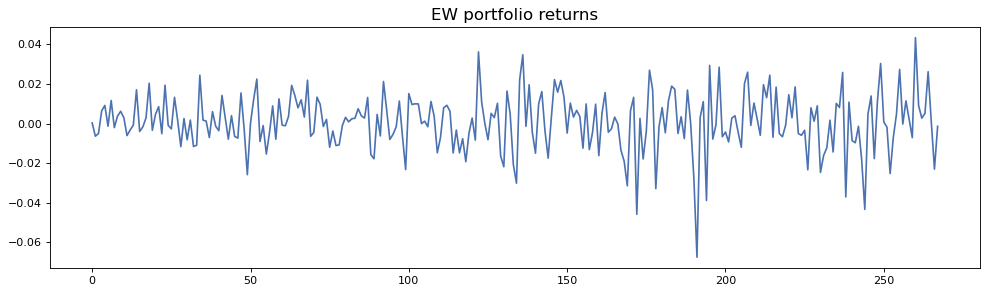

In [10]:
#plotting ew portfolio returns
plt.figure(figsize=(15, 4), dpi=80)
plt.plot(returns_ew)
ax = plt.title("EW portfolio returns",fontsize=15)

Text(0, 0.5, 'Value')

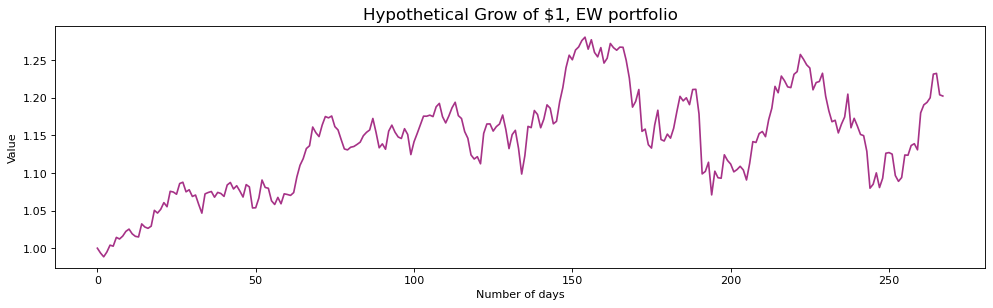

In [11]:
#ptf value graph ew portfolio
cum_returns_ew = (1+returns_ew ).cumprod()

plt.figure(figsize=(15, 4), dpi=80)
plt.plot(cum_returns_ew,color='#a63287')
ax = plt.title("Hypothetical Grow of $1, EW portfolio",fontsize=15)
plt.xlabel('Number of days',fontsize=10)
plt.ylabel('Value',fontsize=10)


In [12]:
#annual returns and std dev ew portfolios
print('For EW portfolio the expected annual returns is '+str(round(returns_ew_annual,2) *100) +'%', 'the expected annual std deviation is '+str(float(np.around(std_dev_ew_annual,3)*100))+'%')


For EW portfolio the expected annual returns is 20.0% the expected annual std deviation is 5.2%


In [13]:
#minimum variance and mean variance max (aka max sharpe) portfolio

In [14]:
#var cov matrix for returns
cov_returns = returns.cov()*252
cov_returns
#average returns for each stock
expected_returns = returns.mean()*252


In [15]:
#calculating efficient frontier and the weights of the max sharpe ptf, returns and standard deviation
ef=EfficientFrontier(expected_returns,cov_returns,weight_bounds=(0,1))
weights_max_sr = ef.max_sharpe()

weights_max_sr = np.array(list(weights_max_sr.items()))
weights_max_sr = weights_max_sr[:,1]
weights_max_sr = np.array(weights_max_sr,dtype ='float')
weights_max_sr
returns_max_sr = np.dot(returns,weights_max_sr)
returns_annual_max_sr = returns_max_sr.mean()*252
std_annual_max_sr = np.dot(np.dot(weights_max_sr.T,returns.cov()*252),weights_max_sr)




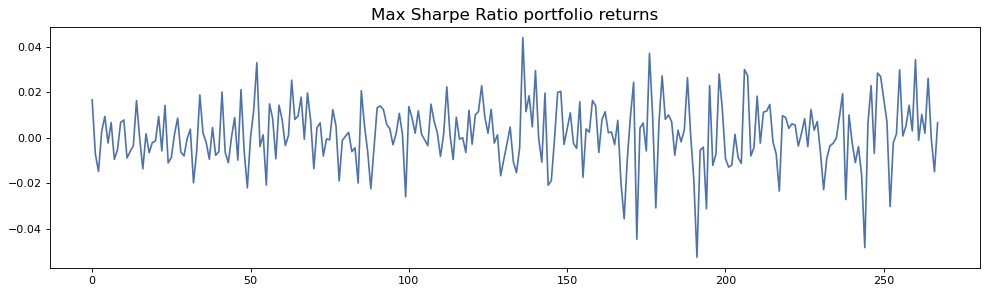

In [16]:
#plotting max sharpe ratio portfolio returns
plt.figure(figsize=(15, 4), dpi=80)
plt.plot(returns_max_sr)
ax = plt.title("Max Sharpe Ratio portfolio returns",fontsize=15)


Text(0, 0.5, 'Value')

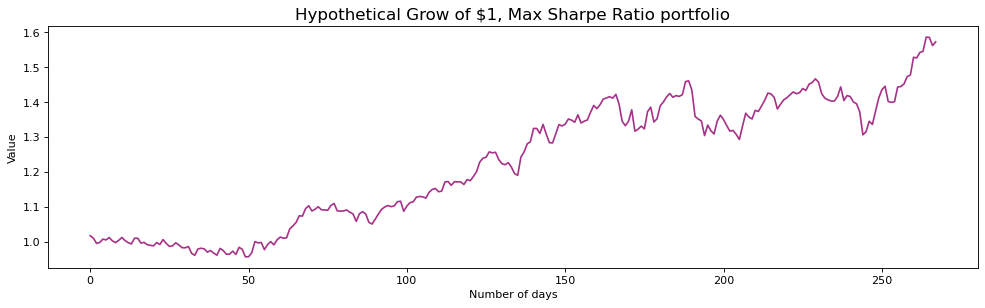

In [17]:
#ptf value graph max sharpe ratio
cum_returns_max_sr = (1+returns_max_sr).cumprod()

plt.figure(figsize=(15, 4), dpi=80)
plt.plot(cum_returns_max_sr,color='#a63287')
ax = plt.title("Hypothetical Grow of $1, Max Sharpe Ratio portfolio",fontsize=15)
plt.xlabel('Number of days',fontsize=10)
plt.ylabel('Value',fontsize=10)

In [18]:
#annual returns and std deviation max sharpe portfolios
print('For Max Sharpe portfolio, the expected return is '+str(round(returns_annual_max_sr,4)*100) +'%' ', the std deviation is ' +str(round(std_annual_max_sr,4)*100)+'%')

For Max Sharpe portfolio, the expected return is 45.07%, the std deviation is 4.95%


In [19]:
#calculating the weights for the minimum variance portfolio, returns and standard deviation
ef_vol=EfficientFrontier(expected_returns,cov_returns,weight_bounds=(0,1))
weights_min_vol = ef_vol.min_volatility()
weights_min_vol= np.array(list(weights_min_vol.items()))
weights_min_vol = weights_min_vol[:,1]
weights_min_vol = np.array(weights_min_vol,dtype ='float')
weights_min_vol
returns_min_vol = np.dot(returns,weights_min_vol)
returns_annual_min_vol = returns_min_vol.mean()*252
std_annual_min_vol = np.dot(np.dot(weights_min_vol.T,returns.cov()*252),weights_min_vol)

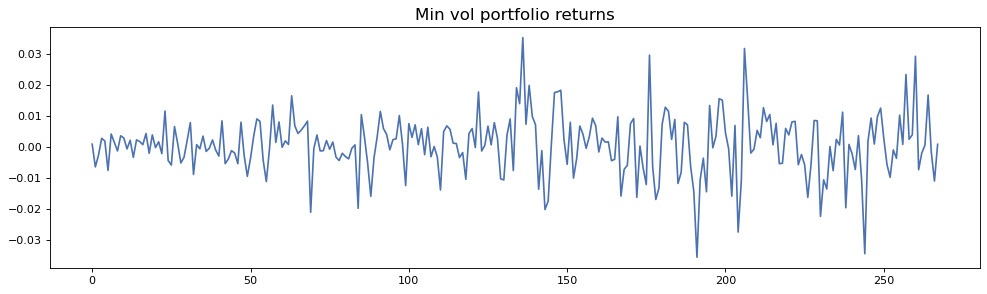

In [20]:
#plotting min vol portfolio returns
plt.figure(figsize=(15, 4), dpi=80)
plt.plot(returns_min_vol)
ax = plt.title("Min vol portfolio returns",fontsize=15)


Text(0, 0.5, 'Value')

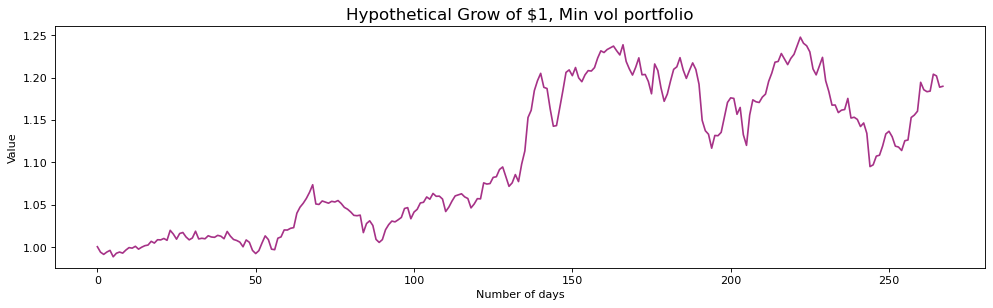

In [21]:
#ptf value graph min vol
cum_returns_min_vol = (1+returns_min_vol).cumprod()

plt.figure(figsize=(15, 4), dpi=80)
plt.plot(cum_returns_min_vol,color='#a63287')
ax = plt.title("Hypothetical Grow of $1, Min vol portfolio",fontsize=15)
plt.xlabel('Number of days',fontsize=10)
plt.ylabel('Value',fontsize=10)

In [22]:
#annual returns and std deviation min vol
print('For min vol the expected annual returns is '+str(round(returns_annual_min_vol,4)*100)+'%' +', std dev is'+str(round(std_annual_min_vol,3)*100)+'%')

For min vol the expected annual returns is 17.49%, std dev is2.3%


In [23]:
#buy and hold portfolio

In [24]:
#building the weights vector
weight_bh = np.zeros((len(returns),number_of_columns))

for i in range(0,len(returns)):
    for j in range(0,number_of_columns):
        weight_bh[i,j] = prices.iloc[i+1,j]/prices.iloc[i+1,:].sum()
returns_bh = np.dot(returns,weight_bh.T)
returns_bh = np.diagonal(returns_bh)
returns_bh
returns_annual_bh = returns_bh.mean()*252

returns_annual_std_bh = std_dev_ew_annual

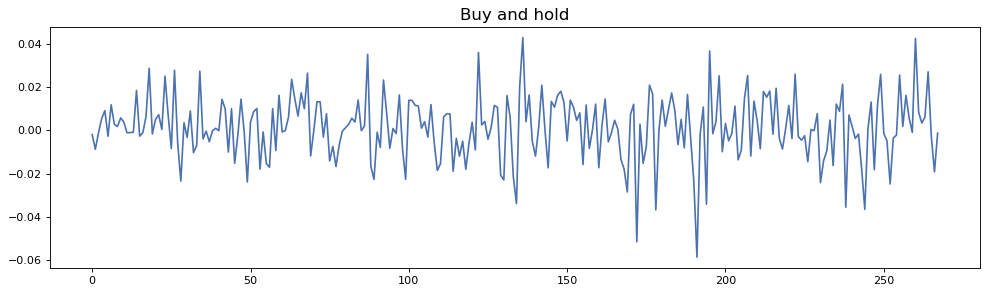

In [25]:
#plotting buy and hold ratio portfolio returns
plt.figure(figsize=(15, 4), dpi=80)
plt.plot(returns_bh)
ax = plt.title("Buy and hold",fontsize=15)

Text(0, 0.5, 'Value')

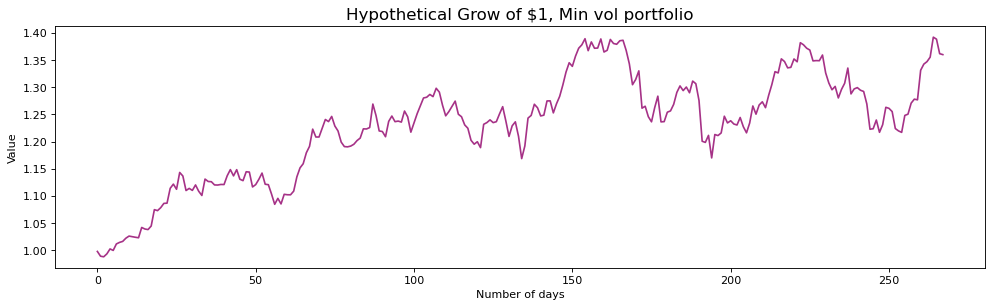

In [26]:
#ptf value graph bh
cum_returns_bh = (1+returns_bh).cumprod()

plt.figure(figsize=(15, 4), dpi=80)
plt.plot(cum_returns_bh,color='#a63287')
ax = plt.title("Hypothetical Grow of $1, Min vol portfolio",fontsize=15)
plt.xlabel('Number of days',fontsize=10)
plt.ylabel('Value',fontsize=10)

In [27]:
#inverse of the correlation with the market portfolio


In [73]:
#getting the data for the index, S&P 500 and calculating the weights for the portfolio inversely correlated with the market
data_index =pdr.get_data_yahoo('^GSPC',start,end)
data_index
prices_index = data_index.Close

prices_index =prices_index.dropna()
prices_index
returns_index = prices_index/prices_index.shift(1)-1
returns_index = returns_index.dropna()
returns_index
index_dates=returns_index.index.to_frame().reset_index(drop=True)
merged_returns = pd.merge(returns,returns_index,on ='Date')
correlations = merged_returns.corr()
correlations = correlations.iloc[0:-1,-1]
sum_correlations = correlations.sum()
weights_cyclical = correlations/sum_correlations
weights_cyclical.to_numpy()






array([ 0.14939499,  0.15864059,  0.10913471,  0.03226358,  0.08400994,
        0.11604309,  0.11096357,  0.08377176,  0.07909828, -0.00989843,
        0.03764059,  0.04893734])

In [85]:
#returns cyclical portfolio
returns_cyclical = np.dot(returns,weights_cyclical)
returns_cyclical
returns_cyclical_annual = returns_cyclical.mean()*252
returns_cyclical_annual
returns_cyclical_annual_std = np.dot(np.dot(weights_cyclical.T,returns.cov()*252),weights_cyclical)

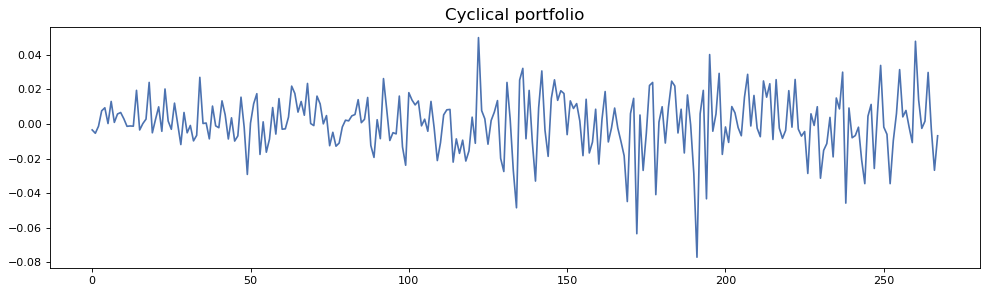

In [88]:
#plotting cyclical portfolio
plt.figure(figsize=(15, 4), dpi=80)
plt.plot(returns_cyclical)
ax = plt.title("Cyclical portfolio",fontsize=15)

Text(0, 0.5, 'Value')

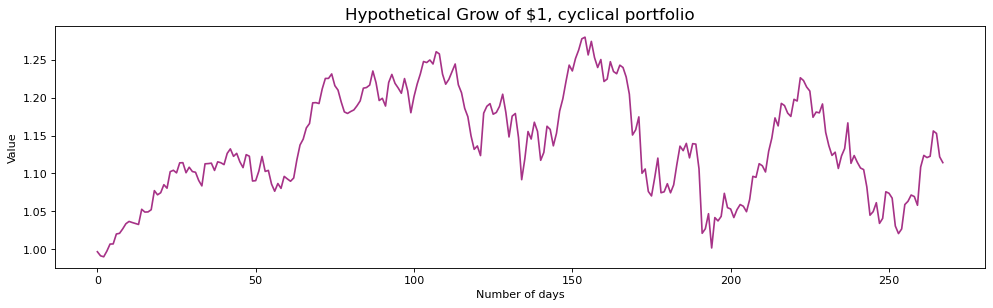

In [89]:
#ptf value graph cyclical
cum_returns_cyclical = (1+returns_cyclical).cumprod()

plt.figure(figsize=(15, 4), dpi=80)
plt.plot(cum_returns_cyclical,color='#a63287')
ax = plt.title("Hypothetical Grow of $1, cyclical portfolio",fontsize=15)
plt.xlabel('Number of days',fontsize=10)
plt.ylabel('Value',fontsize=10)

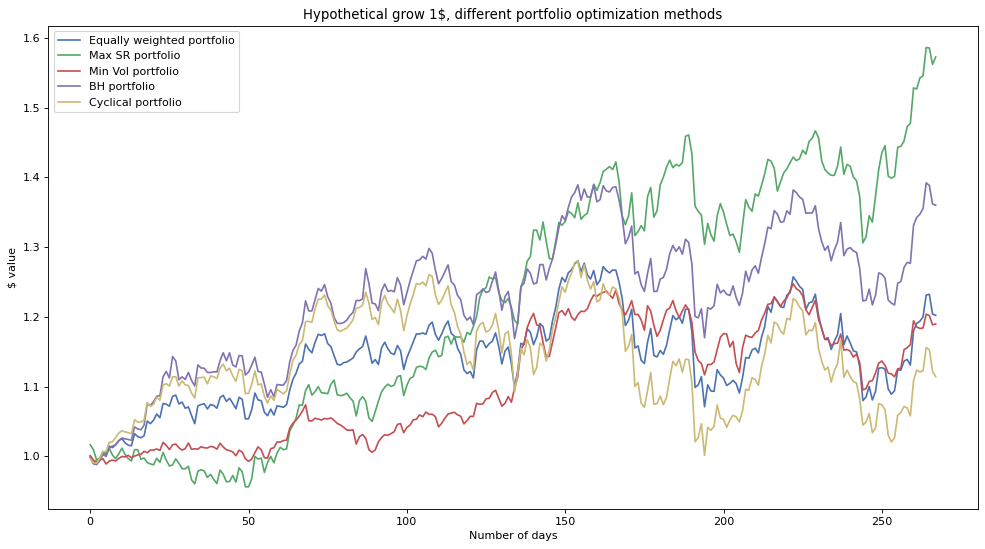

In [90]:
#comparing ptf value in different methods
plt.figure(figsize=(15, 8), dpi=80)
plt.plot(cum_returns_ew,label ='Equally weighted portfolio')
plt.plot(cum_returns_max_sr,label ='Max SR portfolio')
plt.plot(cum_returns_min_vol,label ='Min Vol portfolio')
plt.plot(cum_returns_bh,label ='BH portfolio')
plt.plot(cum_returns_cyclical, label ='Cyclical portfolio')
plt.title('Hypothetical grow 1$, different portfolio optimization methods')
plt.xlabel('Number of days')
plt.ylabel('$ value')
plt.legend()
plt.show()